In [1]:
import os
import numpy as np

In [2]:
input_filenames = 'filenames_all.txt'

In [3]:
with(open(input_filenames)) as f:
    files = f.readlines()
files = [x.strip() for x in files]

if len(files) == 0:
    raise ValueError("No files provided!!")
print("Merging "+str(len(files))+" files")

Merging 300 files


In [4]:
csv_file = "PMT label - Sheet3.csv"
def GenMapping(csv_file):
    mPMT_to_index = {}
    with open(csv_file) as f:
        rows = f.readline().split(",")[1:]
        rows = [int(r.strip()) for r in rows]

        for line in f:
            line_split = line.split(",")
            col = int(line_split[0].strip())
            for row, value in zip(rows, line_split[1:]):
                value = value.strip()
                if value: # If the value is not empty
                    mPMT_to_index[int(value)] = [col, row]
    return mPMT_to_index

mPMT_to_index = GenMapping(csv_file)

In [9]:
import matplotlib.pyplot as plt
POS_MAP = [(8,4), #0
           (7,2), #1
           (6,0), #2
           (4,0), #3
           (2,0), #4
           (1,1), #5
           (0,4), #6
           (1,6), #7
           (2,8), #8
           (4,8), #9
           (6,8), #10
           (7,6), #11
           # Inner ring
           (6,4), #12
           (5,2), #13
           (3,2), #14
           (2,4), #15
           (3,6), #16
           (5,6), #17
           (4,4)] #18
# Function to get a 2D array of pixels representing a single event
def make_mpmt(pmt_array):
    mpmt = np.zeros((10, 10))
    for i, val in enumerate(pmt_array):
        mpmt[POS_MAP[i][0]][POS_MAP[i][1]] = val
    return mpmt
def tile(canvas, ul, pmts):
    # First, create 10x10 grid representing single mPMT
    mpmt = make_mpmt(pmts)
        
    # Then, place grid on appropriate position on canvas
    for row in range(10):
        for col in range(10):
            canvas[row+ul[0]][col+ul[1]] = mpmt[row][col]
    return canvas

def plot_single_image(data, padding=1):
    assert(len(data.shape) == 3 and data.shape[2] == 19)
    rows = data.shape[0]
    cols = data.shape[1]
    # Make empty output pixel grid
    output = np.zeros(((10+padding)*rows-padding, (10+padding) *cols-padding))
    i, j = 0, 0
    for row in range(rows):
        for col in range(cols):
            pmts = data[row, col]
            output = tile(output, (i, j), pmts)
            j += 10+padding
        i += 10+padding
        j = 0
    return output



KeyboardInterrupt: 

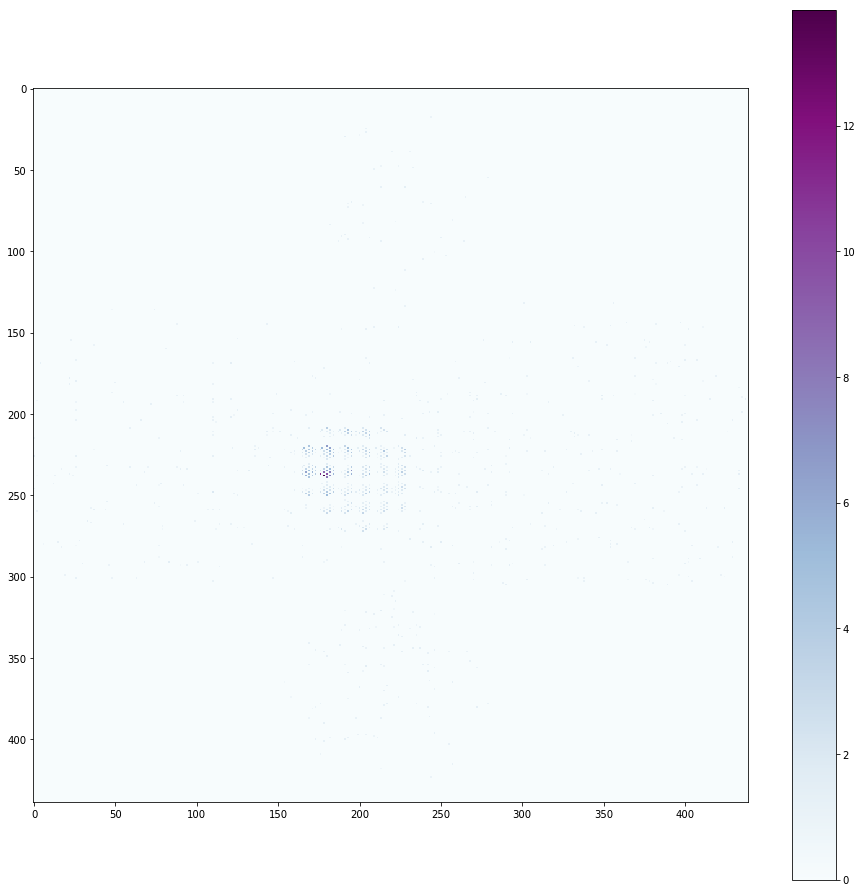

In [15]:
for i in range(len(files)):
    data = np.load(files[i])
    image = np.zeros((len(data['digi_hit_pmt']), 40, 40, 38))
    for l in range(len(data['digi_hit_pmt'])):
        hit_pmts = data['digi_hit_pmt'][l]
        charge = data['digi_hit_charge'][l]
        time = data['digi_hit_time'][l]
        for j in range(len(hit_pmts)):
            hit_mpmt = hit_pmts[j] // 19
            pmt_channel = hit_pmts[j] % 19
            index = mPMT_to_index[hit_mpmt]
            image[l, index[0], index[1], pmt_channel] = charge[j]
            image[l, index[0], index[1], pmt_channel + 19] = time[j]
        output = plot_single_image(image[l,:,:,:19])
        plt.imshow(np.sqrt(output), cmap='BuPu') #Needs to be in row,col order
        plt.colorbar()
        figure = plt.gcf() # get current figure
        figure.set_size_inches(16, 16)
        plt.savefig('images/' + os.path.splitext(os.path.basename(files[i]))[0] + '_' + str(l).zfill(3)+'.png')
        plt.close()
        

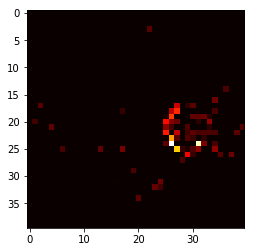

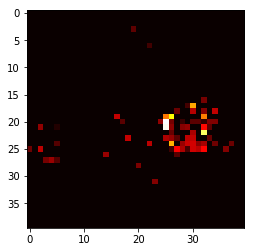

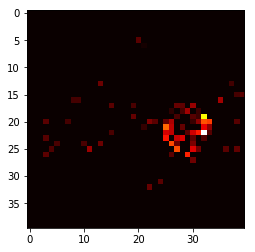

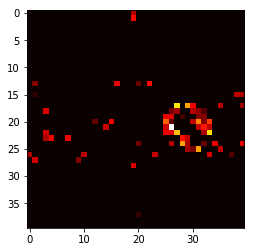

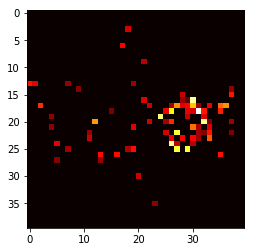

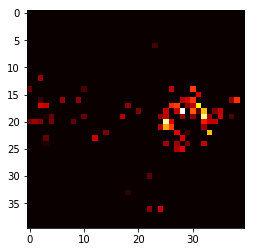

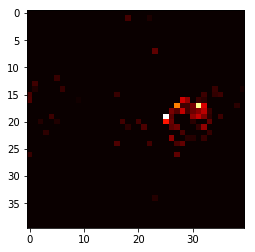

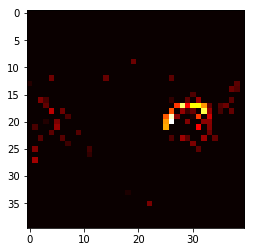

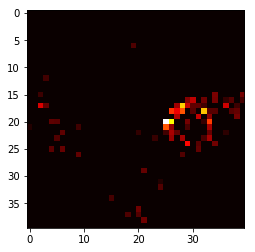

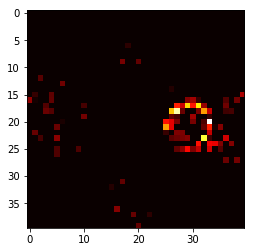

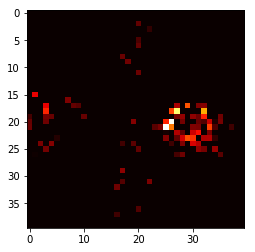

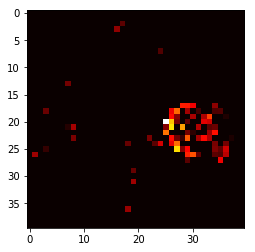

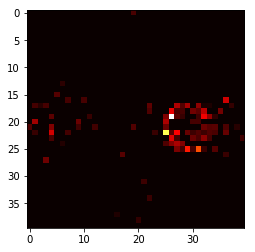

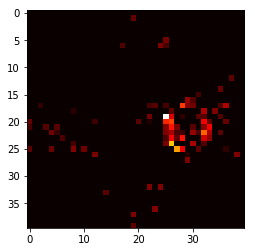

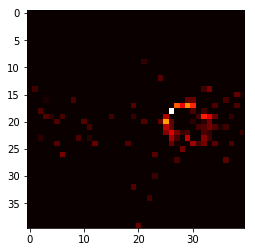

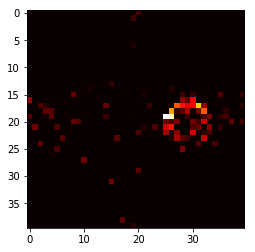

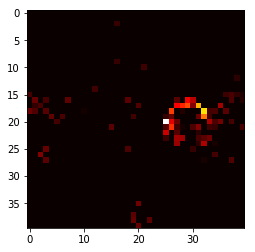

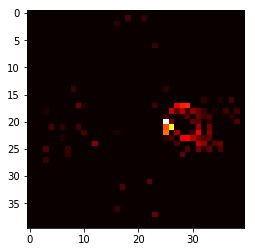

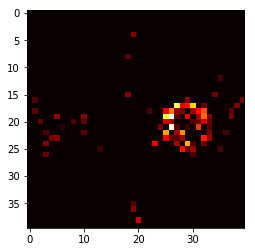

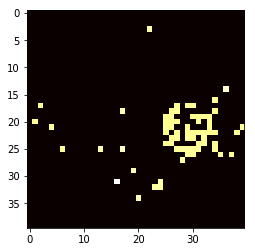

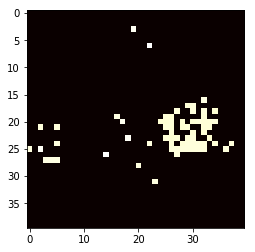

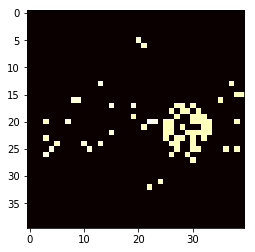

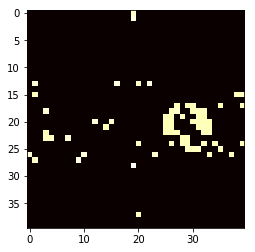

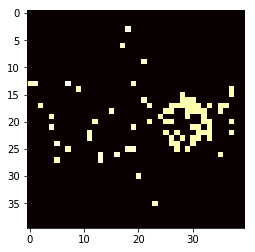

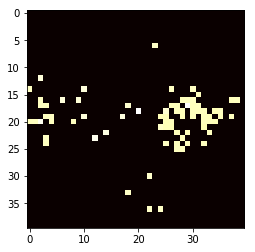

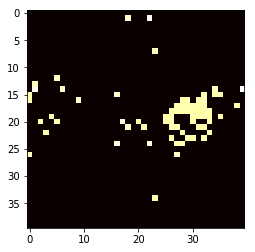

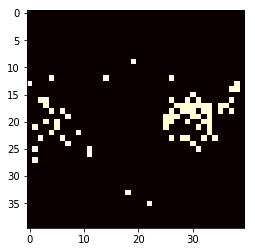

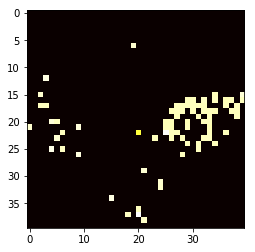

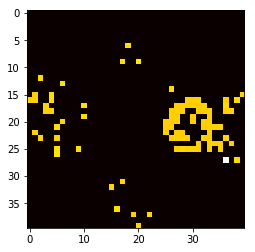

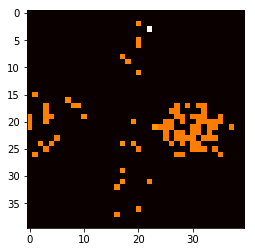

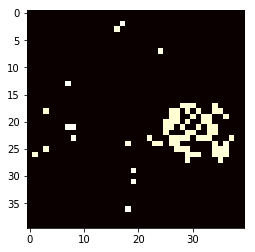

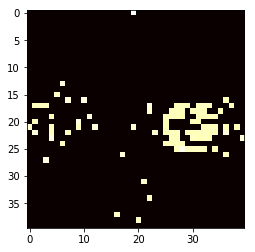

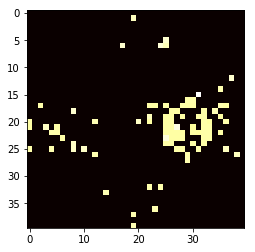

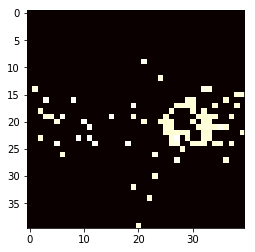

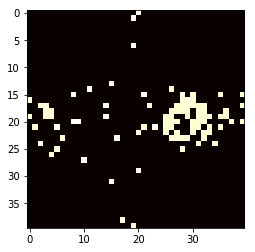

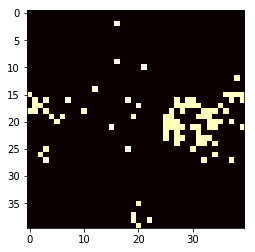

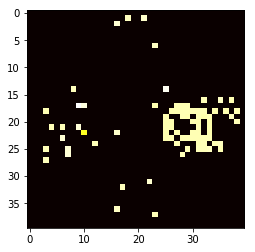

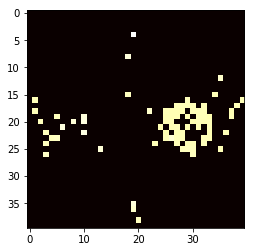

In [9]:
for i in range(19):
    plt.imshow(image[0,:,:,i], cmap='hot')
    plt.show()
for i in range(19):
    plt.imshow(image[0,:,:,i+19], cmap='hot')
    plt.show()